In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [4]:
datanew = data.loc[data['Name_calc'] == 'sBP (mmHg)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'Lipids_Res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  BP_res
4863609    2019-03-04   139.0
4863610    2018-12-18   142.0
4863611    2016-01-18   146.0
4863612    2019-11-14   124.0
4863613    2015-11-23   121.0
...               ...     ...
5322105    2015-08-17   133.0
5322106    2016-09-21   106.0
5322107    2015-07-17   107.0
5322108    2018-01-22   115.0
5322109    2017-08-30   116.0

[458501 rows x 2 columns]


In [5]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew

In [6]:
filt_df = indexedDataset.loc[:, indexedDataset.columns != 'PerformedDate']
low = .25
high = .75

quant_df = filt_df.quantile([low, high])
print(quant_df)
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
filt_df = pd.concat([indexedDataset.loc[:,'PerformedDate'], filt_df], axis=1)
filt_df.dropna(inplace=True)
print(filt_df)

      BP_res
0.25   120.0
0.75   140.0
        PerformedDate  BP_res
4863609    2019-03-04   139.0
4863612    2019-11-14   124.0
4863613    2015-11-23   121.0
4863617    2019-02-28   124.0
4863625    2018-09-24   136.0
...               ...     ...
5322096    2019-07-03   130.0
5322099    2015-03-18   130.0
5322103    2018-01-26   136.0
5322104    2014-06-06   128.0
5322105    2015-08-17   133.0

[184859 rows x 2 columns]


In [7]:
indexedDataset = filt_df.set_index(['PerformedDate'])

In [8]:
from datetime import datetime

In [9]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               BP_res
PerformedDate        
2019-03-04      139.0
2019-11-14      124.0
2015-11-23      121.0
2019-02-28      124.0
2018-09-24      136.0
...               ...
2019-07-03      130.0
2015-03-18      130.0
2018-01-26      136.0
2014-06-06      128.0
2015-08-17      133.0

[184859 rows x 1 columns]


In [10]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               BP_res
PerformedDate        
1992-01-16      130.0
1995-01-13      136.0
1996-05-07      132.0
1996-09-17      130.0
1998-01-05      124.0
...               ...
2019-12-31      124.0
2019-12-31      124.0
2019-12-31      124.0
2019-12-31      123.0
2019-12-31      136.0

[184859 rows x 1 columns]


               BP_res
PerformedDate        
2018-03-01      134.0
2018-03-01      122.0
2018-03-01      134.0
2018-03-01      135.0
2018-03-01      125.0
...               ...
2018-05-31      127.0
2018-05-31      135.0
2018-05-31      134.0
2018-05-31      128.0
2018-05-31      132.0

[5945 rows x 1 columns]


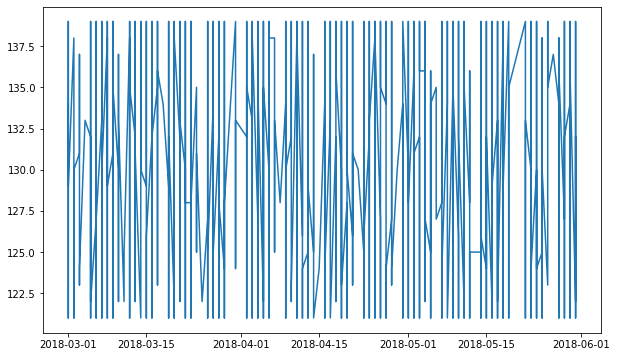

In [13]:
sub = indexedDataset['2018-03':'2018-05']
print(sub)
plt.plot(sub)

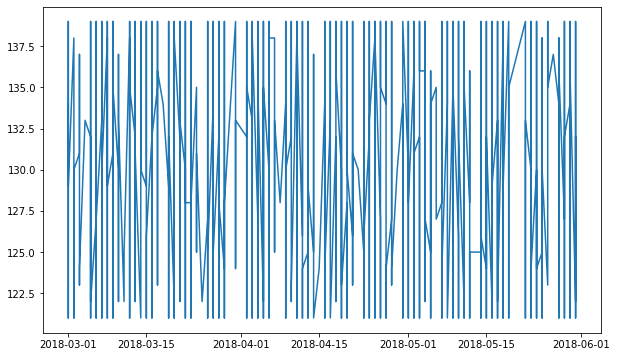

In [14]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['BP_res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [15]:
indexedDataset = new2
print(indexedDataset)

               BP_res
PerformedDate        
2018-03-01      134.0
2018-03-01      122.0
2018-03-01      134.0
2018-03-01      135.0
2018-03-01      125.0
...               ...
2018-05-31      127.0
2018-05-31      135.0
2018-05-31      134.0
2018-05-31      128.0
2018-05-31      132.0

[5945 rows x 1 columns]


In [16]:
print(indexedDataset.max())
print(indexedDataset.min())

BP_res    139.0
dtype: float64
BP_res    121.0
dtype: float64


In [17]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

                   BP_res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-05-31     127.666667
2018-05-31     128.500000
2018-05-31     128.583333
2018-05-31     128.166667
2018-05-31     129.083333

[5945 rows x 1 columns]                  BP_res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-05-31     5.416026
2018-05-31     5.728716
2018-05-31     5.806866
2018-05-31     5.638074
2018-05-31     5.247655

[5945 rows x 1 columns]


In [18]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

                 BP_res
PerformedDate          
2018-03-01     4.897840
2018-03-01     4.804021
2018-03-01     4.897840
2018-03-01     4.905275
2018-03-01     4.828314
...                 ...
2018-05-31     4.844187
2018-05-31     4.905275
2018-05-31     4.897840
2018-05-31     4.852030
2018-05-31     4.882802

[5945 rows x 1 columns]


In [19]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

                 BP_res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-05-31     4.848609
2018-05-31     4.855022
2018-05-31     4.855647
2018-05-31     4.852453
2018-05-31     4.859704

[5945 rows x 1 columns]                  BP_res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-05-31     0.041993
2018-05-31     0.044419
2018-05-31     0.045009
2018-05-31     0.043662
2018-05-31     0.040508

[5945 rows x 1 columns]


In [20]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,BP_res
PerformedDate,
2018-03-01,-0.052765
2018-03-01,-0.001968
2018-03-01,0.000461
2018-03-01,0.002987
2018-03-01,-0.008080
2018-03-01,0.004155
2018-03-01,-0.054065
2018-03-01,0.014425
2018-03-01,0.007346


In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['BP_res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

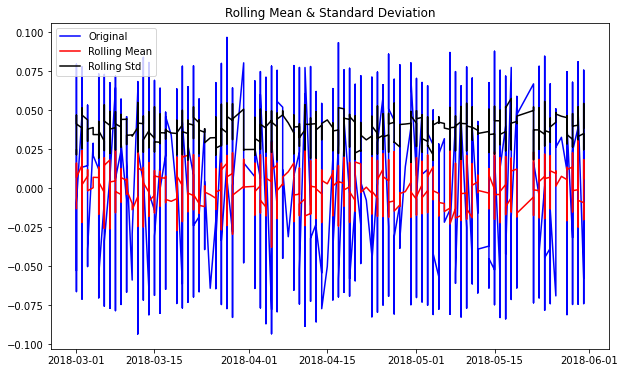

Results of Dickey-Fuller Test:
Test Statistic                  -21.012388
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5900.000000
Critical Value (1%)              -3.431459
Critical Value (5%)              -2.862030
Critical Value (10%)             -2.567031
dtype: float64


In [22]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

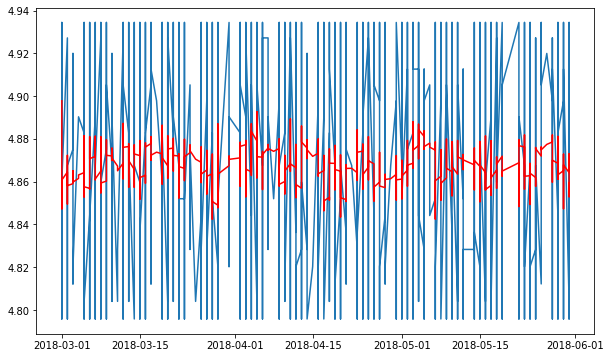

In [23]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

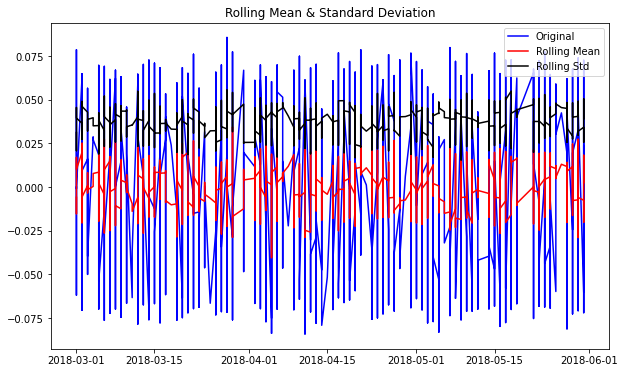

Results of Dickey-Fuller Test:
Test Statistic                -1.856748e+01
p-value                        2.084262e-30
#Lags Used                     2.900000e+01
Number of Observations Used    5.915000e+03
Critical Value (1%)           -3.431456e+00
Critical Value (5%)           -2.862029e+00
Critical Value (10%)          -2.567030e+00
dtype: float64


In [24]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

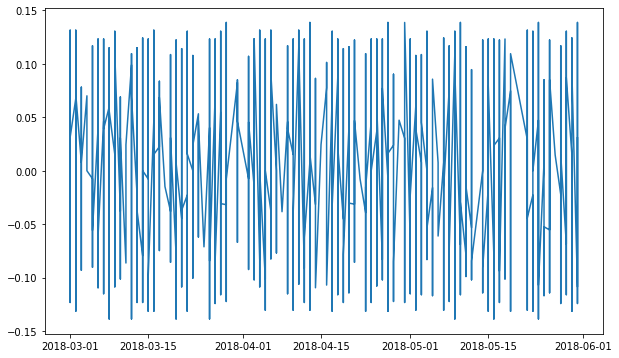

In [25]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

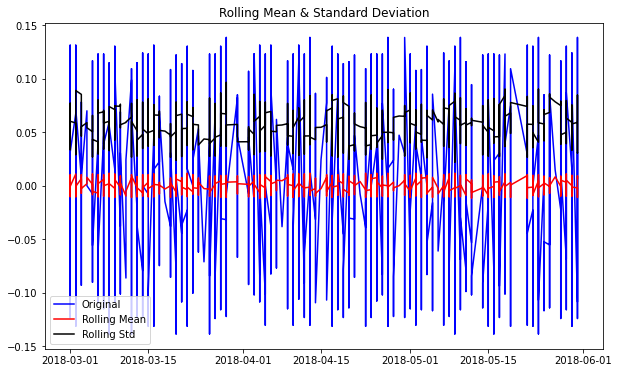

Results of Dickey-Fuller Test:
Test Statistic                  -22.669261
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    5909.000000
Critical Value (1%)              -3.431457
Critical Value (5%)              -2.862029
Critical Value (10%)             -2.567030
dtype: float64


In [26]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-40-a183f21da2ca>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-40-a183f21da2ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


               BP_res
PerformedDate        
2018-03-01        0.0
2018-03-01        0.0
2018-03-01        0.0
2018-03-01        0.0
2018-03-01        0.0
...               ...
2018-05-31        0.0
2018-05-31        0.0
2018-05-31        0.0
2018-05-31        0.0
2018-05-31        0.0

[5945 rows x 1 columns]


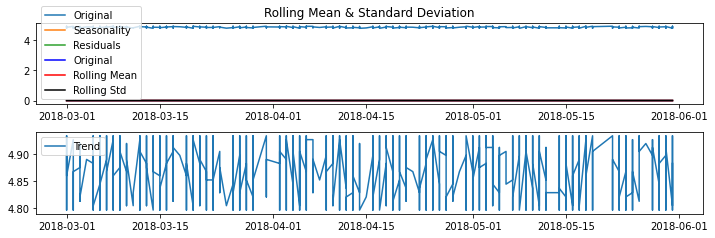

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    5944.000000
Critical Value (1%)              -3.431451
Critical Value (5%)              -2.862026
Critical Value (10%)             -2.567029
dtype: float64


c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [40]:
import statsmodels as sm
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

decomposition = seasonal_decompose(indexedDataset_logScale, period = 1 ) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
s = pd.DataFrame(decomposedLogData)
df = s.rename(columns={"resid": "BP_res"})
print(df)
test_stationarity(df)

In [27]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


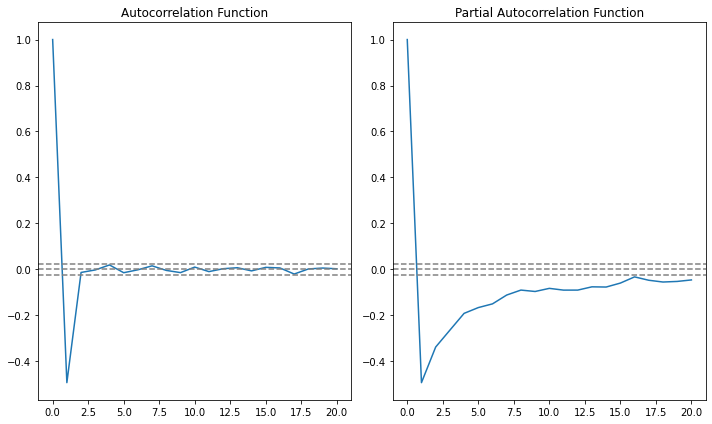

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


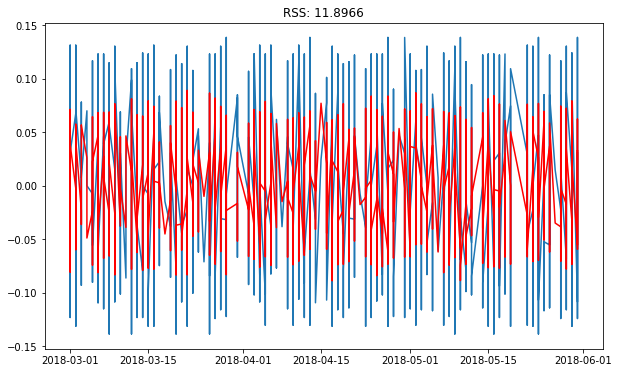

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['BP_res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


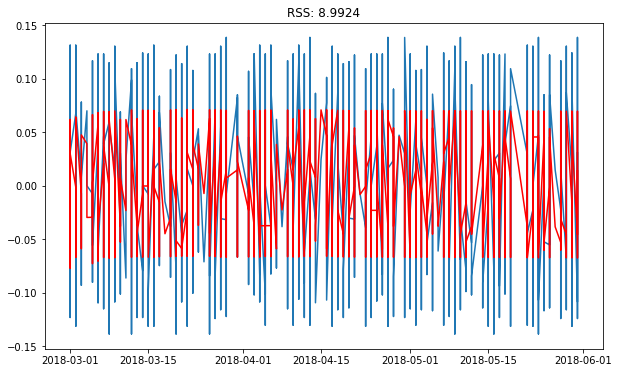

In [30]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['BP_res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release

Text(0.5, 1.0, 'RSS: 8.9928')

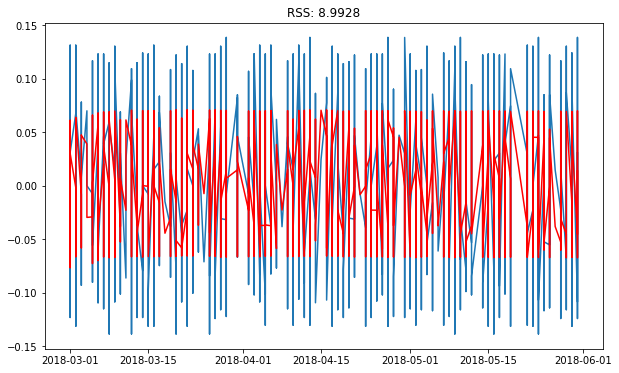

In [31]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['BP_res'])**2))

In [32]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-03-01   -3.052444e-07
2018-03-01    4.630462e-02
2018-03-01   -3.059918e-02
2018-03-01   -2.850606e-02
2018-03-01    3.783213e-02
dtype: float64


In [33]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-03-01   -3.052444e-07
2018-03-01    4.630431e-02
2018-03-01    1.570513e-02
2018-03-01   -1.280093e-02
2018-03-01    2.503120e-02
dtype: float64


In [34]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-03-01    4.897839
2018-03-01    4.944144
2018-03-01    4.913545
2018-03-01    4.885039
2018-03-01    4.922871
dtype: float64

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)

PerformedDate
2018-03-01    133.999959
2018-03-01    140.350675
2018-03-01    136.121100
2018-03-01    132.295608
2018-03-01    137.396513
                 ...    
2018-05-31      8.295618
2018-05-31      8.477792
2018-05-31      8.156922
2018-05-31      7.905979
2018-05-31      8.017263
Length: 557283, dtype: float64


In [36]:
j = (predictions_ARIMA-indexedDataset['BP_res'])**2
#print(j)
k = len(indexedDataset['BP_res'])
#print(k)
u = sum(j/k)
#print(u)
rmse = np.sqrt(u)

In [37]:
print(rmse)

11540.071568440153


Text(0.5, 1.0, 'RMSE: 11540.0716')

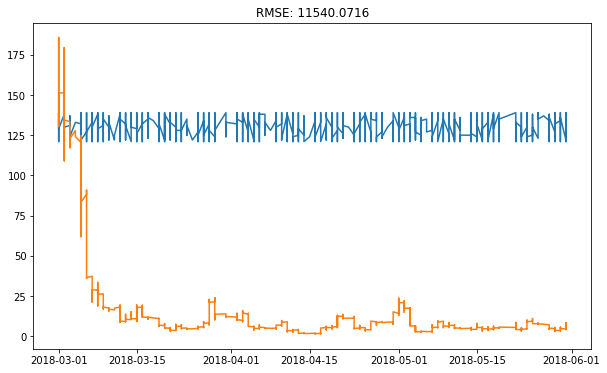

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['BP_res'])**2)/len(indexedDataset['BP_res'])))